In [1]:
import sys

In [2]:
import h5py
from IPython.display import display, Markdown
import matplotlib.cm
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy
import scipy.spatial.distance
import xarray as xr

In [3]:
sys.path.append('../src/lib/')
import plot

In [4]:
sfa = xr.open_dataset('../models/sfa.nc')

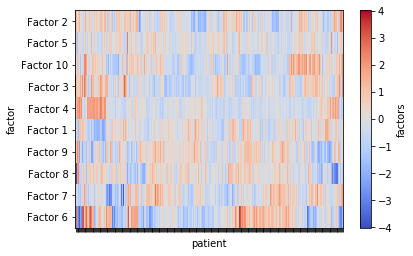

In [5]:
plot.heatmap(sfa['factors'], row_dendrogram=True, col_dendrogram=True, xticklabels=[])

In [6]:
with h5py.File('../data/external/tcga-breast-gexp+rppa+cn-sfa-solution.h5') as f:
    tcga_factors = xr.DataArray(
        data=np.array(f['factors']),
        dims=['sample', 'factor'],
        coords={
            'sample': np.array([s.decode() for s in f['sample names']], 'object'),
            'factor': np.array(['Factor {}'.format(i+1) for i in range(f['factors'].shape[1])]), 
        },
    )

### Factor 1 ###

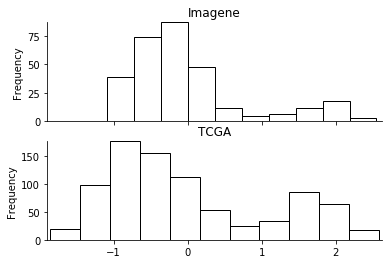

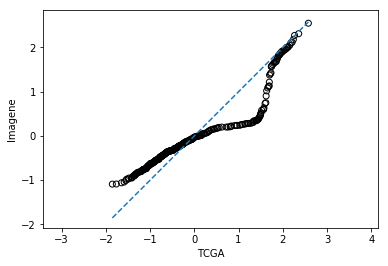

### Factor 2 ###

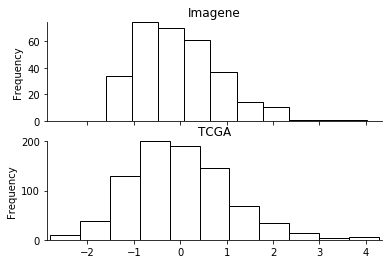

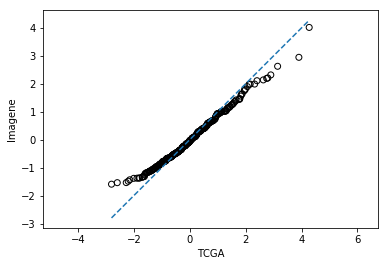

### Factor 3 ###

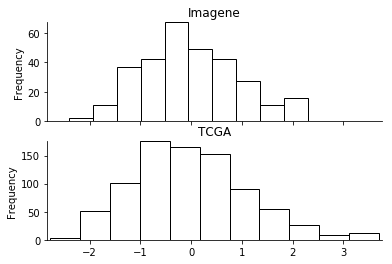

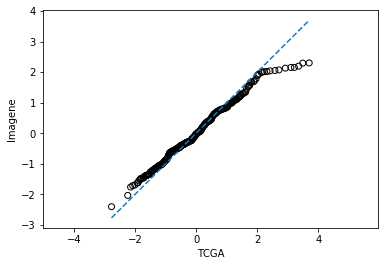

### Factor 4 ###

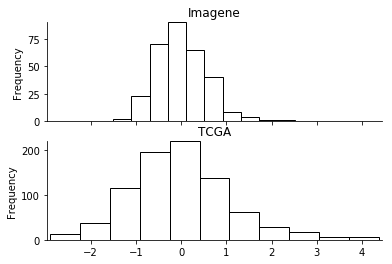

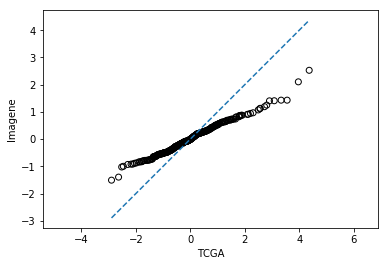

### Factor 5 ###

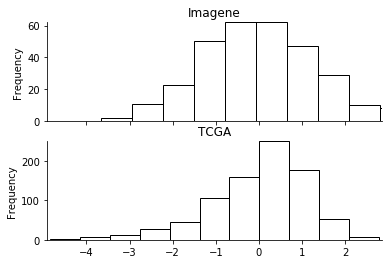

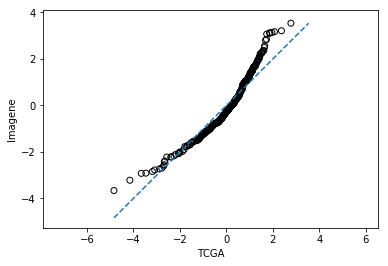

### Factor 6 ###

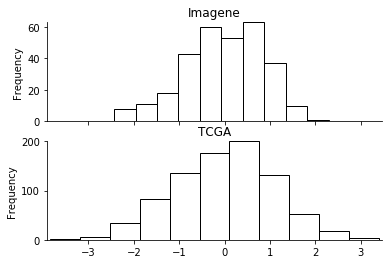

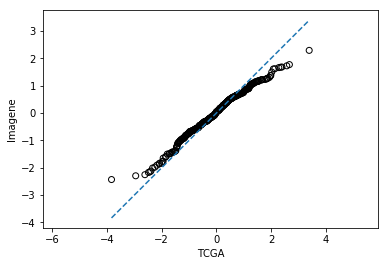

### Factor 7 ###

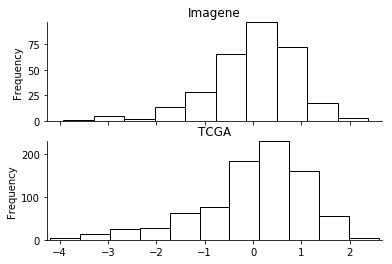

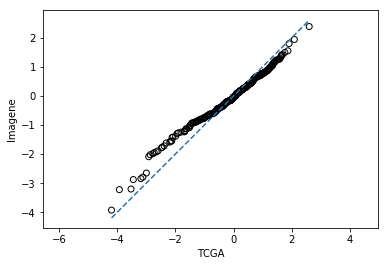

### Factor 8 ###

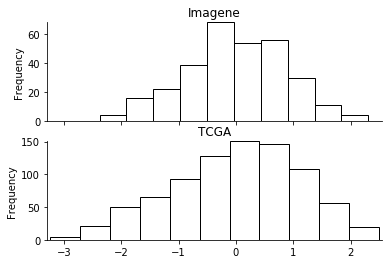

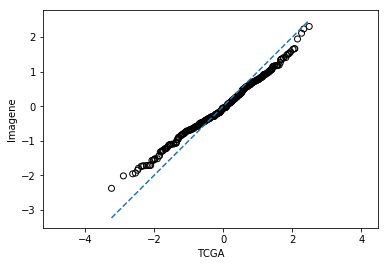

### Factor 9 ###

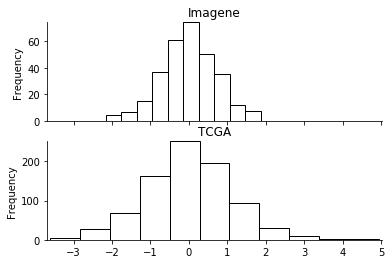

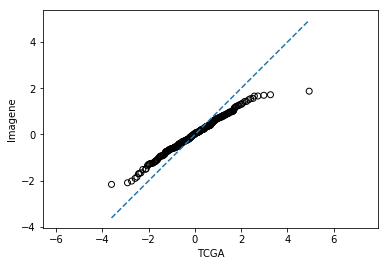

### Factor 10 ###

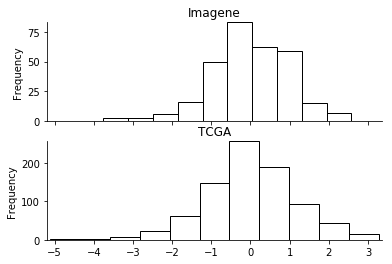

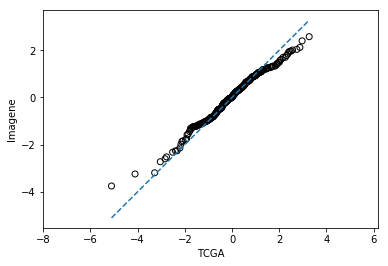

In [7]:
for factor in sfa['factor']:
    factor = factor.item()
    display(Markdown("### {} ###".format(factor)))
    imagene_f = sfa['factors'].loc[{'factor': factor}]
    tcga_f = tcga_factors.loc[{'factor': factor}]
    
    with plot.subplots(2, 1, sharex=True) as (fix, axs):
        plot.hist(imagene_f, ax=axs[0])
        axs[0].set_title('Imagene')
        plot.hist(tcga_f, ax=axs[1])
        axs[1].set_title('TCGA')
    
    plot.qqplot(tcga_f, imagene_f, diagonal=True, xlabel="TCGA", ylabel="Imagene")